# Imports & Globals

In [1]:
import pickle
import pandas as pd
import numpy as np
from yaml import safe_load
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

2022-10-27 15:06:34.450911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 15:06:34.570111: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 15:06:34.992947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/israel/miniconda3/envs/tf/lib/:/home/israel/miniconda3/envs/tf/lib/:/home/israel/miniconda3/envs/tf/lib/:/home/israel/miniconda3/envs/tf/lib/:/home/israel/miniconda3/envs/tf/lib/:/home/israel/miniconda3/e

In [2]:
from StringProcessing import preprocessInput, encode_pad_tag, balance_complete_set

In [3]:
from SiameseModel import CosineDistance, ContrastiveLoss 

tf.version:  2.10.0
tf.keras.version:  2.10.0
tf.config.devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-10-27 15:06:35.958323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:35.991910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:35.992056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:35.992459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
from ModelEvaluation import find_Model_ranks, find_Levenshtein_ranks, find_Gesalt_ranks

In [5]:
#Maximum sequence length including padding
global MAXLEN
with open('LSTM65.yaml', 'r') as file:
    model_config = safe_load(file)
    MAXLEN = model_config['MAXLEN']

# Pickled Datasets

In [6]:
dUnique_df = pd.read_pickle("../data/dUnique_df.pkl")
dfneg2 = pd.read_pickle("../data/dfneg2.pkl")
test = pd.read_pickle("../data/test.pkl")

--------------------------------

# Build model, load weights and evaluate on test data

In [7]:
model = tf.keras.models.load_model(
    './saved_models/{}'.format(model_config["Model_Name"]), 
    custom_objects = {
        'CosineDistance': CosineDistance,
        'ContrastiveLoss': ContrastiveLoss
    }, 
    compile=True, 
    options=None
)
model.summary()

2022-10-27 15:06:36.900146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:36.900324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:36.900427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:36.900572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-27 15:06:36.900677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

2022-10-27 15:06:42.942452: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-10-27 15:06:42.951156: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-10-27 15:06:43.022484: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-10-27 15:06:43.031198: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-10-27 15:06:43.040818: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_sh

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 65)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 65)]         0           []                               
                                                                                                  
 model (Functional)             (None, 65)           115065      ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['model[0][0]',            

---------------------------------------------------------------

# Evaluation

## Unique target labels

In [8]:
dUnique_df.head()

,dUnique_label,dUnique_seq_padded
0,AAI,"[1, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,AARONSROD,"[1, 1, 18, 15, 14, 19, 18, 15, 4, 0, 0, 0, 0, ..."
2,ABIES ALBA,"[1, 2, 9, 5, 19, 27, 1, 12, 2, 1, 0, 0, 0, 0, ..."
3,ABSINTHE,"[1, 2, 19, 9, 14, 20, 8, 5, 0, 0, 0, 0, 0, 0, ..."
4,ABSINTHE WORMWOOD,"[1, 2, 19, 9, 14, 20, 8, 5, 27, 23, 15, 18, 13..."


In [9]:
dUnique_df.index.size

1879

In [10]:
latin_2_common = preprocessInput('../data/vocabulary_LB_to_common_names_09082022.tsv', maxlen= MAXLEN, reflexive=True, balance = False, noise=None, sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lb        1299 non-null   object
 1   mappings  1299 non-null   object
dtypes: object(2)
memory usage: 20.4+ KB
None
Processing file: ----------------------------------------
Renaming colums:
	Current names: Index(['lb', 'mappings'], dtype='object')
	New names: Index(['x', 'y'], dtype='object')
Dropping row with empty cells:
	Dropped 0 rows with empty cells.
	Cleaning string sequences.
	Uppercasing string sequences.
Dropping sequences longer than the maxlen of 65:
	Dropped 0 that exceeded the maximum sequence length.
Dropping duplicate sequences:
	Dropped 321 duplicate sequences.
Done processing: ---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------

In [11]:
common_2_latin = preprocessInput('../data/positive-unmapped-pairs-common-name-or-latin-binomial-copies.tsv', maxlen= MAXLEN, reflexive=True, balance = False, noise=None, sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   common_name     728 non-null    object
 1   latin_binomial  728 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB
None
Processing file: ----------------------------------------
Renaming colums:
	Current names: Index(['common_name', 'latin_binomial'], dtype='object')
	New names: Index(['x', 'y'], dtype='object')
Dropping row with empty cells:
	Dropped 0 rows with empty cells.
	Cleaning string sequences.
	Uppercasing string sequences.
Dropping sequences longer than the maxlen of 65:
	Dropped 0 that exceeded the maximum sequence length.
Dropping duplicate sequences:
	Dropped 728 duplicate sequences.
Done processing: ---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column  Non-Null Count 

In [12]:
gsrs_2_common = preprocessInput('../data/positive-unmapped-pairs-gsrs-name-to-common-name.tsv', maxlen= MAXLEN, reflexive=True, balance = False, noise=None, sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         10838 non-null  object
 1   common_name  199 non-null    object
dtypes: object(2)
memory usage: 169.5+ KB
None
Processing file: ----------------------------------------
Renaming colums:
	Current names: Index(['name', 'common_name'], dtype='object')
	New names: Index(['x', 'y'], dtype='object')
Dropping row with empty cells:
	Dropped 10639 rows with empty cells.
	Cleaning string sequences.
	Uppercasing string sequences.
Dropping sequences longer than the maxlen of 65:
	Dropped 0 that exceeded the maximum sequence length.
Dropping duplicate sequences:
	Dropped 0 duplicate sequences.
Done processing: ---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  --

In [13]:
# vocab = pd.read_csv('../data/lb_to_common_names.csv')
# vocab = vocab[['latin_binomial_clean','common_name_clean']].rename(columns={'latin_binomial_clean': "x", 'common_name_clean': "y"})
# vocab.info()

In [14]:
equivalence_set = pd.concat([latin_2_common, common_2_latin, gsrs_2_common], ignore_index=True)
equivalence_set.drop_duplicates(subset=['x', 'y'], inplace=True)

In [15]:
equivalence_set[equivalence_set["x"] == "CRANBERRY"]

,x,y
2230,CRANBERRY,VACCINIUM MACROCARPON


# Evaluating on test data - NP names only

# Evaluation of drug name predictions
----------------------------
### Find ranks 1-5 from the predicted and fuzzy matches for the matching cases in the test data

# Create a sample from the test set to evaluate

In [16]:
# positive_pairs = matches.sample(n=100)
positive_pairs = test.loc[test["Match"] == 1].sample(n=1000)

In [17]:
positive_pairs.index.size

1000

--------------------------------------

In [18]:
positive_pairs.head()

,x,y,Processed_x,Processed_y,Match,Distance
2100363,ORQCROTMALRNMIAN PYFALLIDA,CROTALARIA PALLIDA,"[15, 18, 17, 3, 18, 15, 20, 13, 1, 12, 18, 14,...","[3, 18, 15, 20, 1, 12, 1, 18, 9, 1, 27, 16, 1,...",1,0
2233524,LAORPRPAHCO,HANDROANTHUS HEPTAPHYLLUS,"[12, 1, 15, 18, 16, 18, 16, 1, 8, 3, 15, 0, 0,...","[8, 1, 14, 4, 18, 15, 1, 14, 20, 8, 21, 19, 27...",1,0
2194299,SDMYYTS CPOGMOU S,MYRTUS COMMUNIS,"[19, 4, 13, 25, 25, 20, 19, 27, 3, 16, 15, 7, ...","[13, 25, 18, 20, 21, 19, 27, 3, 15, 13, 13, 21...",1,0
1615803,EOTDESEAL,HYDRASTIS CANADENSIS WHOLE,"[5, 15, 20, 4, 5, 19, 5, 1, 12, 0, 0, 0, 0, 0,...","[8, 25, 4, 18, 1, 19, 20, 9, 19, 27, 3, 1, 14,...",1,0
465810,UNJIPEQRUCV RGINIAA,POTLOODSEDER,"[21, 14, 10, 9, 16, 5, 17, 18, 21, 3, 22, 27, ...","[16, 15, 20, 12, 15, 15, 4, 19, 5, 4, 5, 18, 0...",1,0


# Structure to contain the results

In [19]:
results = pd.DataFrame(index = ['Exact', 'Equivalent'], columns =['Siamese model', 'Levenshtein','Gesalt'])

----------------------------------------------------

# Predicted Match MRR Evaluation

In [20]:
Predicted = find_Model_ranks(model, df=positive_pairs, targets = dUnique_df, equivalence_set = equivalence_set, ranks=20, find_related_rank=True, report_distances=False)

2022-10-27 15:06:47.775038: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).
2022-10-27 15:06:50.242605: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x24d86670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-10-27 15:06:50.242627: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2022-10-27 15:06:50.246741: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash re

In [21]:
Predicted.sample(n=5)

,x,y,Processed_x,Processed_y,Match,Distance,rank1,rank2,rank3,rank4,...,rank13,rank14,rank15,rank16,rank17,rank18,rank19,rank20,exact_rank,equivalent_rank
1396394,CKLEUWAS,INDIAN BORAGE WHOLE,"[3, 11, 12, 5, 21, 23, 1, 19, 0, 0, 0, 0, 0, 0...","[9, 14, 4, 9, 1, 14, 27, 2, 15, 18, 1, 7, 5, 2...",1,0,CLEAVERS,VITEX AGNUS,COLEUS,ELECAMPANE,...,ELEUTHERO,PLECTRANTHUS AMBOINICUS LOUR SPRENG,COUCHGRASS,LOCUSTBEAN,COCOGRASS,CELANDINE,BLACK SAMPSON,LENTISCUS,inf,3.0
1872869,SLOIDGAOUS PLEVX,SOLIDAGO SIMPLEX,"[19, 12, 15, 9, 4, 7, 1, 15, 21, 19, 27, 27, 1...","[19, 15, 12, 9, 4, 1, 7, 15, 27, 19, 9, 13, 16...",1,0,ALLIUM CEPA,SHALLOT,SOLIDAGO SIMPLEX,SPOONLEAF YUCCA,...,GUELDER ROSE,EPIMEDIUM PUBESCENS,SPANISHNEEDLES,MORINGA OLEIFERA,MARSHMILKWEED,ROBINIA PSEUDOACACIA,SOW THISTLE,SALIX LUCIDA,3.0,3.0
852849,GARDENKHELIOTBRPE,GARDENHELIOTROPE,"[7, 1, 18, 4, 5, 14, 11, 8, 5, 12, 9, 15, 20, ...","[7, 1, 18, 4, 5, 14, 8, 5, 12, 9, 15, 20, 18, ...",1,0,GARDENHELIOTROPE,GARDEN VALERIAN,GOATSRUE,GALEGA OFFICINALIS,...,HAIRY BEGGARTICKS,SPREADING PELLITORY,GANODERMA,GARDEN SAGE,CHINESE LICORICE,PARIETARIA JUDAICA,GREEKCLOVER,GREEK HAY,1.0,1.0
908479,BABLSMPNR,BALSAMPEAR,"[2, 1, 2, 12, 19, 13, 16, 14, 18, 0, 0, 0, 0, ...","[2, 1, 12, 19, 1, 13, 16, 5, 1, 18, 0, 0, 0, 0...",1,0,BALSAMPEAR,BALLOTA NIGRA,BLACK HOREHOUND,BALSAMAPPLE,...,LOBARIA PULMONARIA,MOMORDICA CHARANTIA,BEEPLANT,HOLLY MAHONIA,ROSA CANINA,BONESET,BACOPA,BAYBERRY,1.0,1.0
1524199,JNANA ISPUGANDA WHDL,MAJANA SUGANDA WHOLE,"[10, 14, 1, 14, 1, 27, 9, 19, 16, 21, 7, 1, 14...","[13, 1, 10, 1, 14, 1, 27, 19, 21, 7, 1, 14, 4,...",1,0,MAJANA SUGANDA WHOLE,SENNA HOC,SENNA ALEXANDRINA WHODD,INDIAN SENNA WHOLE,...,TINNEVELLY SENNA WHOLE,CASSIA SENNA WHOLE,SANA WHOLE,HINDISANA WHOLE,COFFEE SENNA,ALEXANDRIAN SENNA WHOLE,BHUIKHAKHASA WHOLE,AFRIKANSKAYA SENNA WHOLE,1.0,1.0


In [22]:
Models_mrr = Predicted.loc[:,['x', 'exact_rank', 'equivalent_rank']]
Models_mrr.loc[:,'exact_reciprocal_rank'] = 1/Models_mrr.loc[:, 'exact_rank']
Models_mrr.loc[:,'equivalent_reciprocal_rank'] = 1/Models_mrr.loc[:, 'equivalent_rank']
Models_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe()

,exact_reciprocal_rank,equivalent_reciprocal_rank
count,1000.000000,1000.000000
mean,0.437918,0.672240
std,0.415778,0.408446
min,0.000000,0.000000
25%,0.062500,0.250000
50%,0.250000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [23]:
#get median and stdev
# Models_mrr['exact_rank'].median(), Models_mrr['exact_rank'].std()

In [24]:
#get median and stdev
# Models_mrr['equivalent_rank'].median(), Models_mrr['equivalent_rank'].std()

In [25]:
# results.loc['Exact', 'Siamese model'] = 1/Models_mrr.index.size * Models_mrr['exact_reciprocal_rank'].sum()

In [26]:
# results.loc['Equivalent', 'Siamese model'] = 1/Models_mrr.index.size * Models_mrr['equivalent_reciprocal_rank'].sum()

In [27]:
results.loc['Exact', 'Siamese model'] = Models_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][0]

In [28]:
results.loc['Exact_std', 'Siamese model'] = Models_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][0]

In [29]:
results.loc['Equivalent', 'Siamese model'] = Models_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][1]

In [30]:
results.loc['Equivalent_std', 'Siamese model'] = Models_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][1]

In [31]:
results

,Siamese model,Levenshtein,Gesalt
Exact,0.437918,NaN,NaN
Equivalent,0.67224,NaN,NaN
Exact_std,0.415778,NaN,NaN
Equivalent_std,0.408446,NaN,NaN


--------------------------------------

# Comparison with fuzzy string match

# Fuzzy Levenshtein Match MRR Evaluation

In [32]:
Levenshtein = find_Levenshtein_ranks(positive_pairs, targets = dUnique_df, equivalence_set = equivalence_set, ranks=20, find_related_rank=True, report_distances=False)

In [33]:
Levenshtein.sample(n=10)

,x,y,Processed_x,Processed_y,Match,Distance,rank1,rank2,rank3,rank4,...,rank13,rank14,rank15,rank16,rank17,rank18,rank19,rank20,exact_rank,equivalent_rank
42083,ST JOHS CBREHD,CERATONIA SILIQUA,"[19, 20, 27, 10, 15, 8, 19, 27, 3, 2, 18, 5, 8...","[3, 5, 18, 1, 20, 15, 14, 9, 1, 27, 19, 9, 12,...",1,0,ST JOHNS BREAD,ST JOHNSBREAD,ST JOHNS WORT,ST JOHNSWORT,...,GREENSTEM JOEPYEWEED,COPTIS COPTIS CHINENSIS HOC,DIANTHUS CRENATUS,SONCHUS OLERACEUS,BLACK STINKING HOREHOUND,SWEET FALSE CHAMOMILE,QUERCUS CERRIS,ATRACTYLODES MACROCEPHALA,inf,1.0
950307,BLUNTLE VDNZVQELAMQSOIN,BLUNTLEAVED EVERLASTING,"[2, 12, 21, 14, 20, 12, 5, 27, 22, 4, 14, 26, ...","[2, 12, 21, 14, 20, 12, 5, 1, 22, 5, 4, 27, 5,...",1,0,BLUNTLEAVED EVERLASTING,SCHOENOPLECTUS TABERNAEMONTANI,AILANTHUS FLAVESCENS WHOLE,PLECTRANTHUS AMBOINICUS LOUR SPRENG,...,HARUNGANA MADAGASCARIENSIS,BERBERIS SERRATIFOLIA WHOLE,COLEUS SUBORBICULARIS WHOLE,BERBERIS COERULESCENS WHOLE,BERBERIS CERATOPHYLLA WHOLE,SAMBUCUS ROTUNDIFOLIA WHOLE,GLYCYRRHIZA INFLATA BATALIN,TOONA LONGIFOLIA WHOLE,1.0,1.0
952894,PEUMUMS BJLUDS,BOLDO,"[16, 5, 21, 13, 21, 13, 19, 27, 2, 10, 12, 21,...","[2, 15, 12, 4, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,PEUMUS BOLDUS,SAMBUCUS EBULUS,TEUCRIUM BOTRYS,CYPERUS ROTUNDUS,...,TEUCRIUM CHAMAEDRYS,HYPERICUM REVOLUTUM,EPIMEDIUM PUBESCENS,CLEMATIS VILLOSA,APIUM GRAVEOLENS,RUBUS RIGIDUS,ELYMUS REPENS,DESMODIUM GLUTINOSUM,inf,1.0
2228456,TANETHUM GGMEOLEQN,ANETHUM GRAVEOLENS,"[20, 1, 14, 5, 20, 8, 21, 13, 27, 7, 7, 13, 5,...","[1, 14, 5, 20, 8, 21, 13, 27, 7, 18, 1, 22, 5,...",1,0,ANETHUM GRAVEOLENS,APIUM GRAVEOLENS,TANACETUM VULGARE,ZANTHOXYLUM SIMULANS,...,EPIMEDIUM PUBESCENS,VACCINIUM ANGUSTIFOLIUM,PLECTRANTHUS AMBOINICUS,HYLOTELEPHIUM TELEPHIUM,EQUISETUM HYEMALE WHOLE,LACHNANTHES CAROLINIANA,PLECTRANTHUS ESCULENTUS,PLATANTHERA PSYCODES,1.0,1.0
155396,OVREGN,OREGANO,"[15, 22, 18, 5, 7, 14, 0, 0, 0, 0, 0, 0, 0, 0,...","[15, 18, 5, 7, 1, 14, 15, 0, 0, 0, 0, 0, 0, 0,...",1,0,OREGANO,SOYBEAN,JAVABEAN,SOYABEAN,...,BORAGE,GALEGA,OREGON GRAPE,DELONIX REGIA,OXYRIA DIGYNA,LOCUSTBEAN,GOOSEGRASS,OLIVE LEAF,1.0,1.0
1763327,CLLIIMA SLBNIA IRS,COLLOMIA LINEARIS,"[3, 12, 12, 9, 9, 13, 1, 27, 19, 12, 2, 14, 9,...","[3, 15, 12, 12, 15, 13, 9, 1, 27, 12, 9, 14, 5...",1,0,COLLOMIA LINEARIS,COLLINSIA PARVIFLORA,MELISSA OFFICINALIS,ALBIZIA JULIBRISSIN,...,PALIURUS SPINACHRISTI,CEDRELA SINENSIS WHOLE,CUPIDS SHAVINGBRUSH,ECBALLIUM ELATERIUM,ALBIZIA CORIARIA,CALLUNA VULGARIS,DELPHINIUM GRANDIFLORUM,SCUTELLARIA LATERIFLORA,1.0,1.0
563632,HYYPLLINHSAMARFINU,PHYLLANTHUSAMARUS,"[8, 25, 25, 16, 12, 12, 9, 14, 8, 19, 1, 13, 1...","[16, 8, 25, 12, 12, 1, 14, 20, 8, 21, 19, 1, 1...",1,0,PHYLLANTHUSAMARUS,PHYLLANTHUS AMARUS,PHYTOLACCA AMERICANA,CHRYSOPSIS MARIANA,...,FRAXINUS AMERICANA,CHIONANTHUS VIRGINICUS,HYDRASTIS CANADENSIS L,MALABARTAMARIND,INDIAN TAMARIND,HUNGARIAN CHAMOMILE,ECBALLIUM ELATERIUM,PHYSALIS VIRGINIANA,1.0,1.0
1872869,SLOIDGAOUS PLEVX,SOLIDAGO SIMPLEX,"[19, 12, 15, 9, 4, 7, 1, 15, 21, 19, 27, 27, 1...","[19, 15, 12, 9, 4, 1, 7, 15, 27, 19, 9, 13, 16...",1,0,SOLIDAGO SIMPLEX,GLADIOLUS DALENII,PLECTRANTHUS ESCULENTUS,CNIDOSCOLUS URENS,...,SOLIDAGO CANADENSIS,CLINACANTHUS NUTANS,CODONOPSIS PILOSULA,HYLOTELEPHIUM TELEPHIUM,TALL SCOURINGRUSH WHOLE,COLEUS AMBOINICUS WHOLE,COLEUS AROMATICUS WHOLE,CASSIA ORIENTALIS WHOLE,1.0,1.0
756574,EUROVAN HIKAZEL,EUROPEAN HAZEL,"[5, 21, 18, 15, 22, 1, 14, 27, 8, 9, 11, 1, 26...","[5, 21, 18, 15, 16, 5, 1, 14, 27, 8, 1, 26, 5,...",1,0,EUROPEAN HAZEL,EUROPEANFIELDELM,EUROPEAN FILBERT,EUROPEAN GRAPE,...,EUROPEAN ELDER HOC,EUROPEAN BLACK ELDER WHOLE,SZECHWAN CHINABERRY,EUROPEAN ELDERBERRY WHOLE,SQUAWMINT TICKWEED,ERYTHRINA HERBACEA,AMERICAN SPIKENARD,EUROPEAN BLACK ELDERBERRY WHOLE,1.0,1.0
2361142,AGUHARIP CNTADENSILS,SANGUINARIA CANADENSIS,"[1, 7, 21, 8, 1, 18, 9, 16, 27, 3, 14, 20, 1, ...","[19, 1, 14, 7, 21, 9, 14, 1, 18, 9, 1, 27, 3, ...",1,0,SANGUINARIA CANADENSIS,HYDRASTIS CANADENSIS,HYDRASTIS CANADENSIS L,WARNERIA CANADENSIS WHOLE,...,ASARUM CANADEN

In [34]:
Levenshtein_mrr = Levenshtein.loc[:,['x', 'exact_rank', 'equivalent_rank']]
Levenshtein_mrr.loc[:,'exact_reciprocal_rank'] = 1/Levenshtein_mrr.loc[:, 'exact_rank']
Levenshtein_mrr.loc[:,'equivalent_reciprocal_rank'] = 1/Levenshtein_mrr.loc[:, 'equivalent_rank']
Levenshtein_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe()

,exact_reciprocal_rank,equivalent_reciprocal_rank
count,1000.000000,1000.000000
mean,0.566564,0.903107
std,0.480256,0.254226
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [35]:
#get median and stdev
# Levenshtein_mrr['exact_rank'].median(), Levenshtein_mrr['exact_rank'].std()

In [36]:
#get median and stdev
# Levenshtein_mrr['equivalent_rank'].median(), Levenshtein_mrr['equivalent_rank'].std()

In [37]:
# results.loc['Exact', 'Levenshtein'] = 1/Levenshtein_mrr.index.size  * Levenshtein_mrr['exact_reciprocal_rank'].sum()

In [38]:
# results.loc['Equivalent', 'Levenshtein'] = 1/Levenshtein_mrr.index.size  * Levenshtein_mrr['equivalent_reciprocal_rank'].sum()

In [39]:
results.loc['Exact', 'Levenshtein'] = Levenshtein_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][0]

In [40]:
results.loc['Exact_std', 'Levenshtein'] = Levenshtein_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][0]

In [41]:
results.loc['Equivalent', 'Levenshtein'] = Levenshtein_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][1]

In [42]:
results.loc['Equivalent_std', 'Levenshtein'] = Levenshtein_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][1]

--------------------------------------

# Fuzzy Gesalt Match MRR Evaluation

In [43]:
Gesalt = find_Gesalt_ranks(positive_pairs.loc[:, ('x', 'y')], targets = dUnique_df, equivalence_set = equivalence_set, ranks= 20, find_related_rank=True)

In [44]:
Gesalt_mrr = Gesalt.loc[:,['x', 'exact_rank', 'equivalent_rank']]
Gesalt_mrr.loc[:,'exact_reciprocal_rank'] = 1/Gesalt_mrr.loc[:, 'exact_rank']
Gesalt_mrr.loc[:,'equivalent_reciprocal_rank'] = 1/Gesalt_mrr.loc[:, 'equivalent_rank']
Gesalt_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe()

,exact_reciprocal_rank,equivalent_reciprocal_rank
count,1000.000000,1000.000000
mean,0.562520,0.893717
std,0.478355,0.269053
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [45]:
#get median and stdev
# Gesalt_mrr['exact_rank'].median(), Gesalt_mrr['exact_rank'].std()

In [46]:
#get median and stdev
# Gesalt_mrr['equivalent_rank'].median(), Gesalt_mrr['equivalent_rank'].std()

In [47]:
# results.loc['Exact', 'Gesalt'] = 1/Gesalt_mrr.index.size  * Gesalt_mrr['exact_reciprocal_rank'].sum()

In [48]:
# results.loc['Equivalent', 'Gesalt'] = 1/Gesalt_mrr.index.size  * Gesalt_mrr['equivalent_reciprocal_rank'].sum()

In [49]:
results.loc['Exact', 'Gesalt'] = Gesalt_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][0]

In [50]:
results.loc['Exact_std', 'Gesalt'] = Gesalt_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][0]

In [51]:
results.loc['Equivalent', 'Gesalt'] = Gesalt_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["mean"][1]

In [52]:
results.loc['Equivalent_std', 'Gesalt'] = Gesalt_mrr[['exact_reciprocal_rank', 'equivalent_reciprocal_rank']].describe().loc["std"][1]

--------------------------------------

In [106]:
results = results.astype(float).round(3)

In [107]:
results.T

,Exact,Equivalent,Exact_std,Equivalent_std
Siamese model,0.438,0.672,0.416,0.408
Levenshtein,0.567,0.903,0.480,0.254
Gesalt,0.563,0.894,0.478,0.269


In [108]:
# results.T.plot.bar(rot=0, subplots=True);

In [109]:
results.loc["Exact"].to_list()

[0.438, 0.567, 0.563]

In [110]:
results.loc["Exact"].std()

0.07335075550622044

In [111]:
results.iloc[1, :]

Siamese model    0.672
Levenshtein      0.903
Gesalt           0.894
Name: Equivalent, dtype: float64

In [115]:
for i in results.columns:
    print(results.round(2).loc[:, i][1])

0.67
0.9
0.89


<Figure size 1000x500 with 0 Axes>

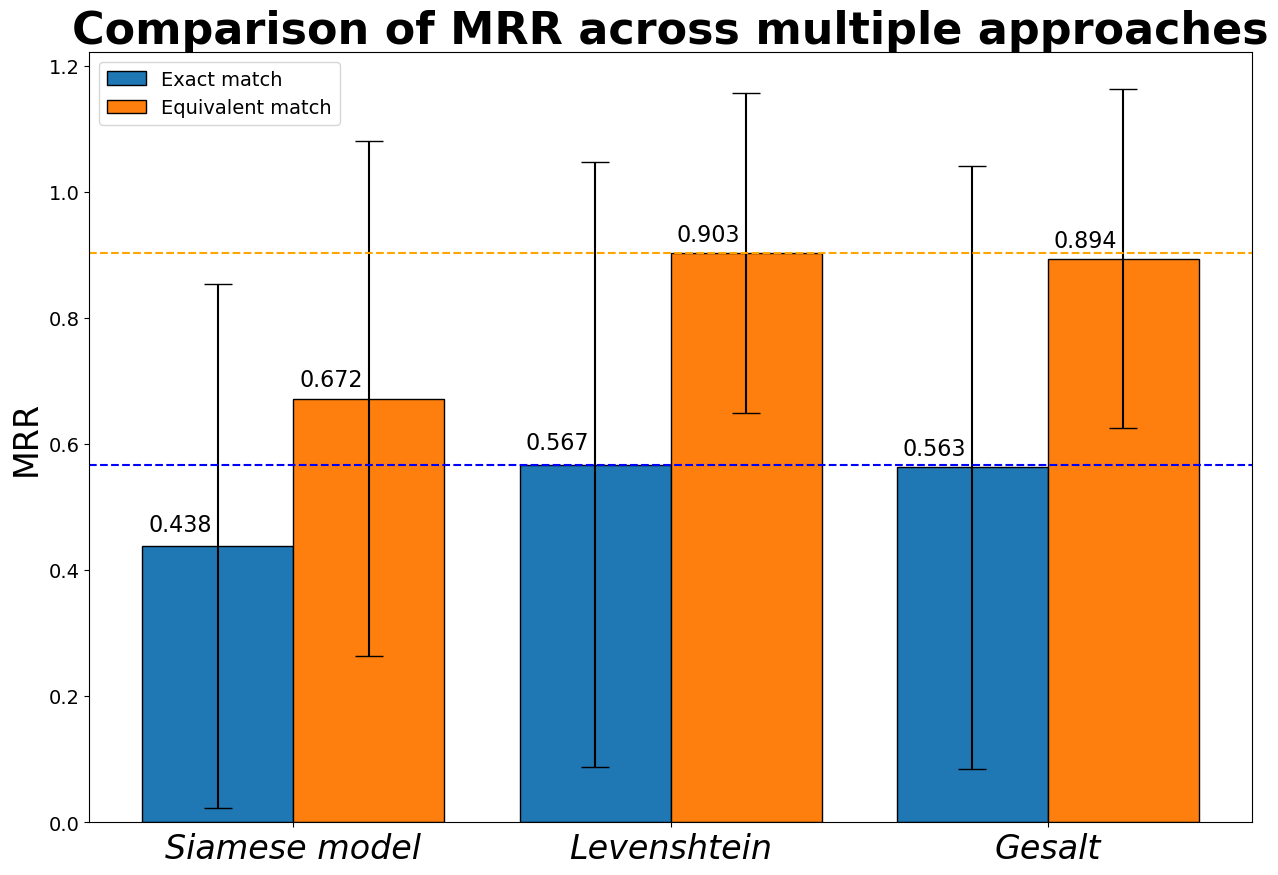

In [137]:
X = results.columns
Exact = results.loc["Exact"].to_list()
Equivalent = results.loc["Equivalent"].to_list()

X_axis = np.arange(len(X))
plt.figure(figsize=[10,5])

plt.figure(figsize=(15,10))

plt.bar(X_axis - 0.2, Exact, 0.4, yerr=results.loc["Exact_std"], capsize=10, label = 'Exact match')
plt.bar(X_axis + 0.2, Equivalent, 0.4, yerr=results.loc["Equivalent_std"], capsize=10, label = 'Equivalent match')

plt.axhline(y=max(Equivalent), color="orange", linestyle="--")
plt.axhline(y=max(Exact), color="blue", linestyle="--")

for i in range(results.columns.size):
    plt.annotate(str(results.round(3).iloc[:, i][0]), xy=(X_axis[i] - 0.3, results.round(2).iloc[:, i][0] + 0.05), ha='center', va='top', fontsize = 16)
    plt.annotate(str(results.round(3).iloc[:, i][1]), xy=(X_axis[i] + 0.1, results.round(2).iloc[:, i][1] + 0.05), ha='center', va='top', fontsize = 16)
    
# plt.errorbar( X_axis - 0.2, Exact[0], yerr=results.loc["Exact_std"][0], fmt="o", color="r")
# plt.errorbar( X_axis, Exact[1], yerr=results.loc["Exact_std"][1], fmt="o", color="r")
# plt.errorbar( X_axis + 0.2, Exact[2], yerr=results.loc["Exact_std"][2], fmt="o", color="r")
    
plt.xticks(X_axis, X, style="italic", weight='regular', fontsize=24)
plt.tick_params(axis="y", labelsize= 14)
# plt.xlabel("Approaches", weight='semibold', fontsize='large')
plt.ylabel("MRR", fontsize=24)
plt.title("Comparison of MRR across multiple approaches", weight='bold', fontsize=32)
plt.legend(fontsize=14, loc='upper left')
plt.show()

# Translation tests

In [58]:
# translation = '../data/translation_test_nps_202203171038.csv'
# translation_set = preprocessInput(translation, maxlen = MAXLEN, balance= False, reflexive = False, noise = None)

In [59]:
# translation_set.head()

In [60]:
# encode_pad_tag(translation_set, 1, 0, MAXLEN)

In [61]:
# novelty = find_ranks(model, translation_set.sample(n=10), ranks=10, find_related_rank= False, report_distances=False)

In [62]:
# novelty.sample(10)

In [63]:
# test["Processed_np_name"] = test.np_name.apply(clean).apply(encode).apply(padding)

In [64]:
# test = preprocessInput(unmapped, converters = {"drug_name_original":str}, skip_blank_lines=True, na_filter=True, na_values="")
# test["Processed_drug_name_original"] = test[test.columns[0]].apply(clean).apply(encode).apply(padding)